In [78]:
from imblearn.over_sampling import RandomOverSampler
import os
import pandas as pd

#TODO: Update here
os.chdir(r"D:\\gatech\\cs7641\\supervised_learning")
titanic = pd.read_csv("titanic.csv", header = None)
#Adding the column names
titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']
titanic.columns = titanic_col_names

X = titanic.drop(['Survived'], axis=1)
# X2.dropna()

y = titanic['Survived']

X = pd.get_dummies(X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']])  

y = titanic['Survived'].apply(lambda x: 0 if x == 0.0 else 1)

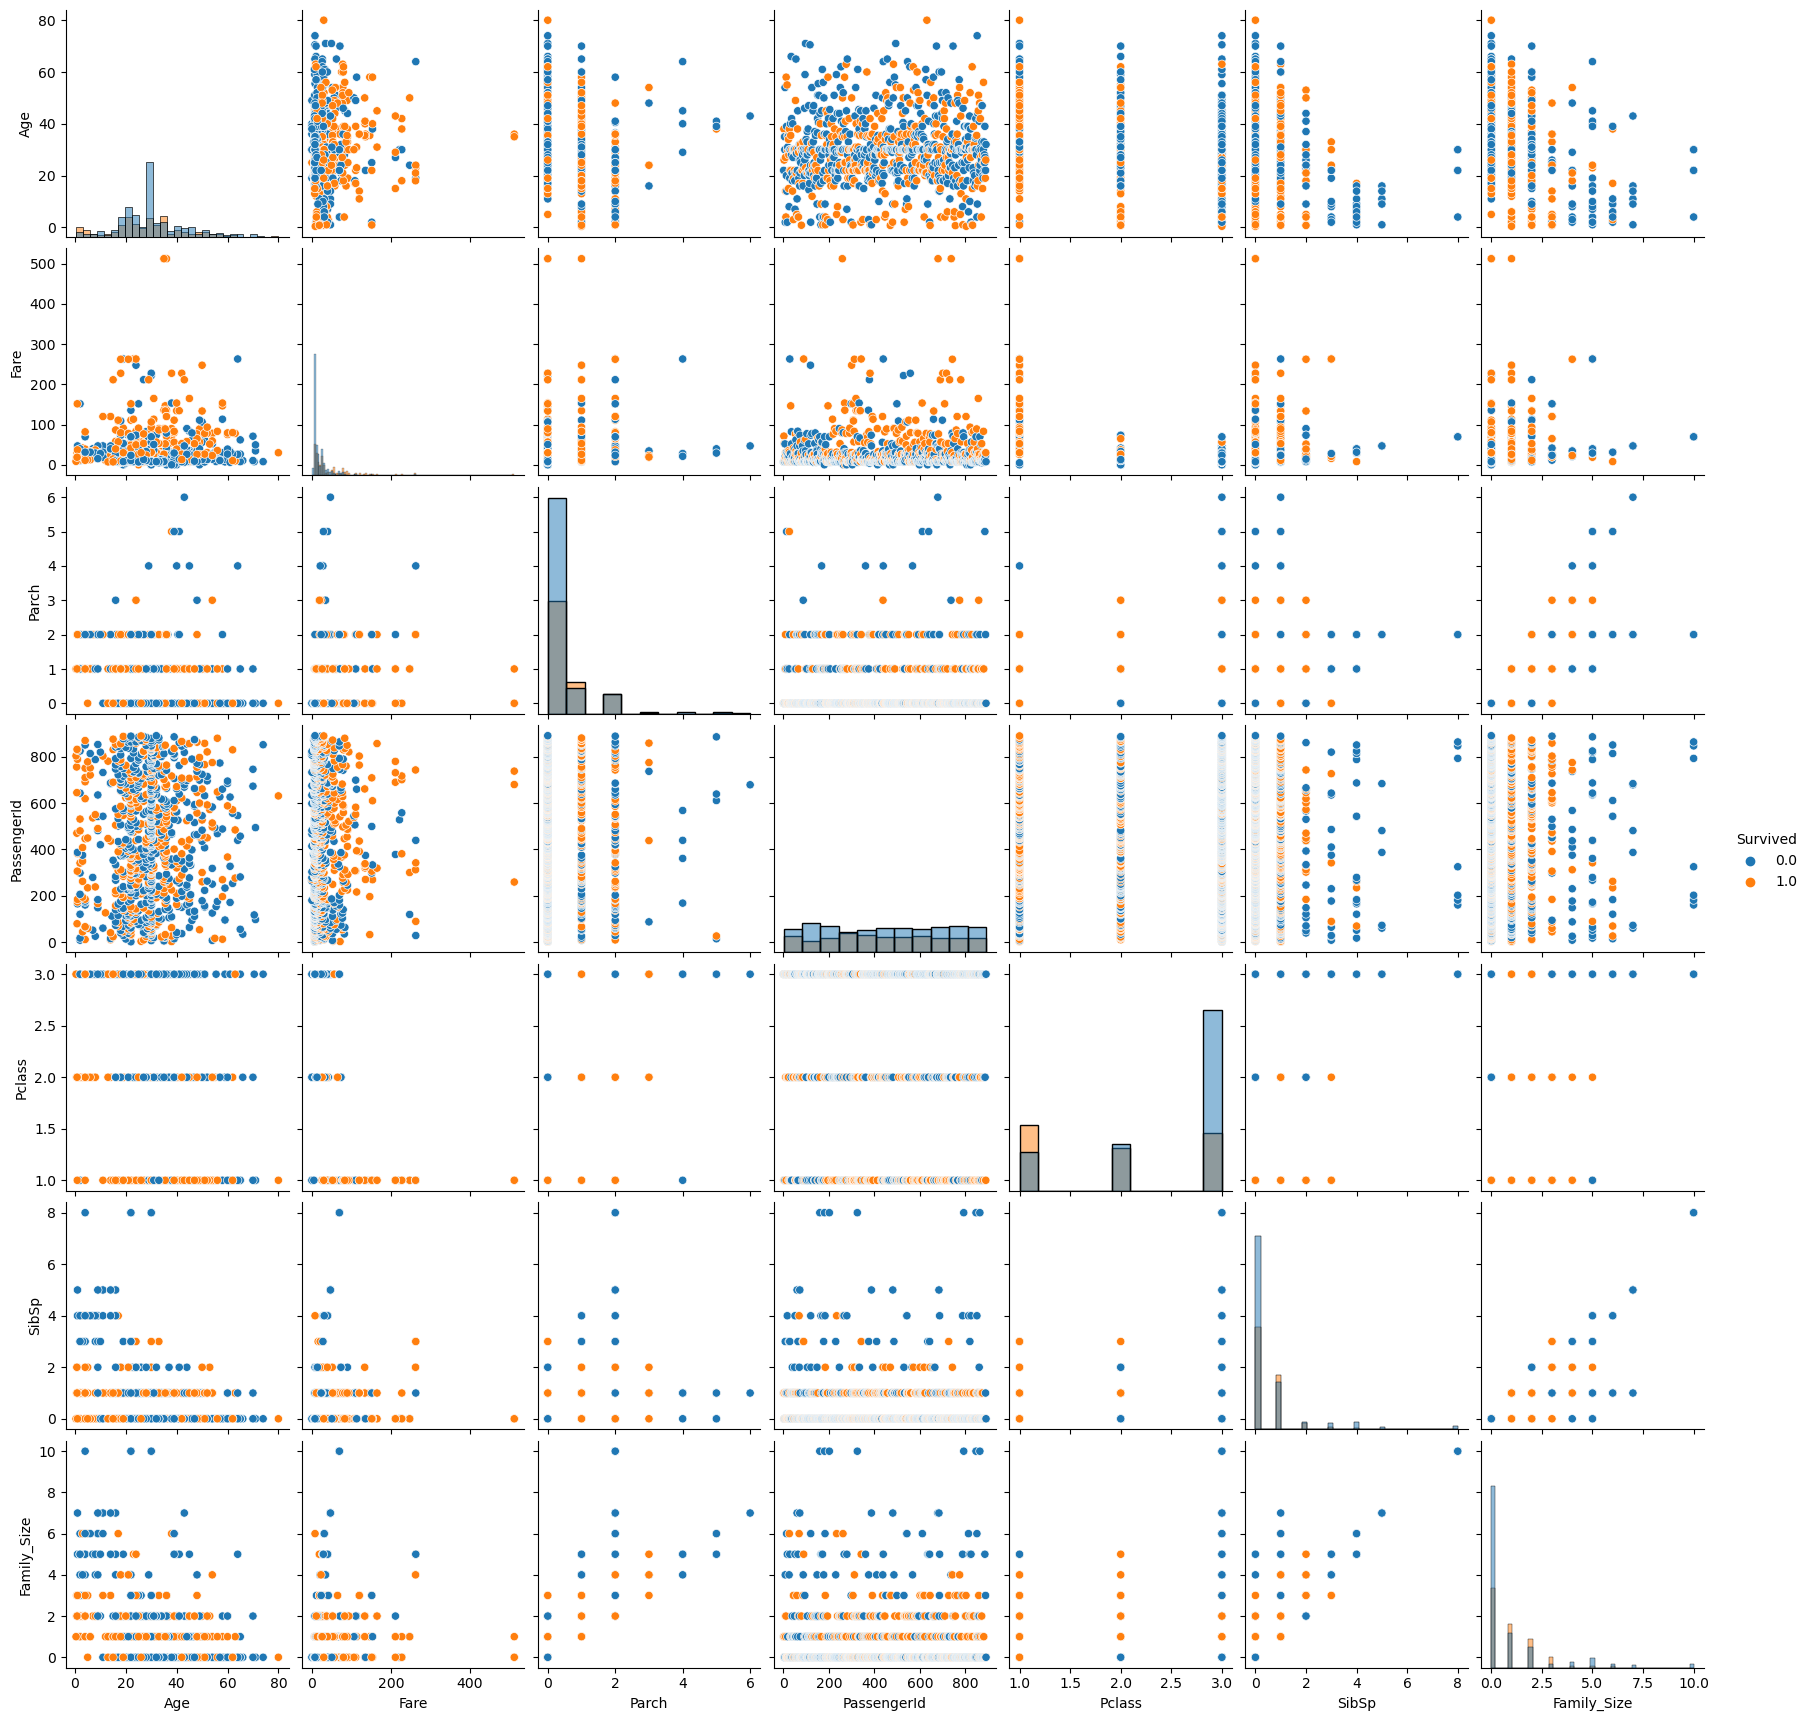

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(titanic, hue='Survived', diag_kind='hist')

# Show the plot
plt.show()

K-Means

In [7]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

labels = kmeans.labels_

print(np.bincount(labels))

[142  20 729]


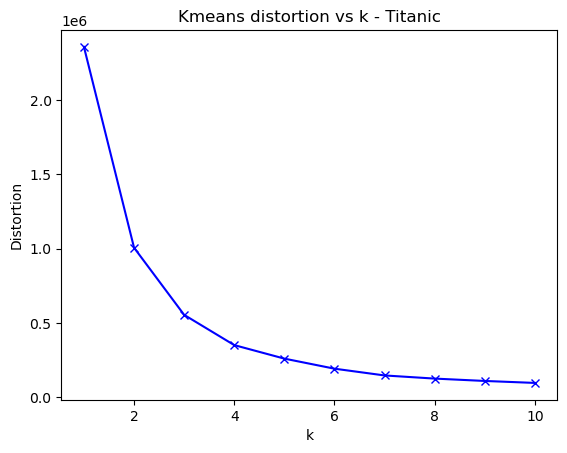

In [39]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.title('Kmeans distortion vs k - Titanic')
plt.show()

In [79]:
#optimal k value is 2
kmeans = KMeans(n_clusters=2, random_state=1714)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1714)

In [80]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
silhouette_score(X, labels)

0.5950428588633403

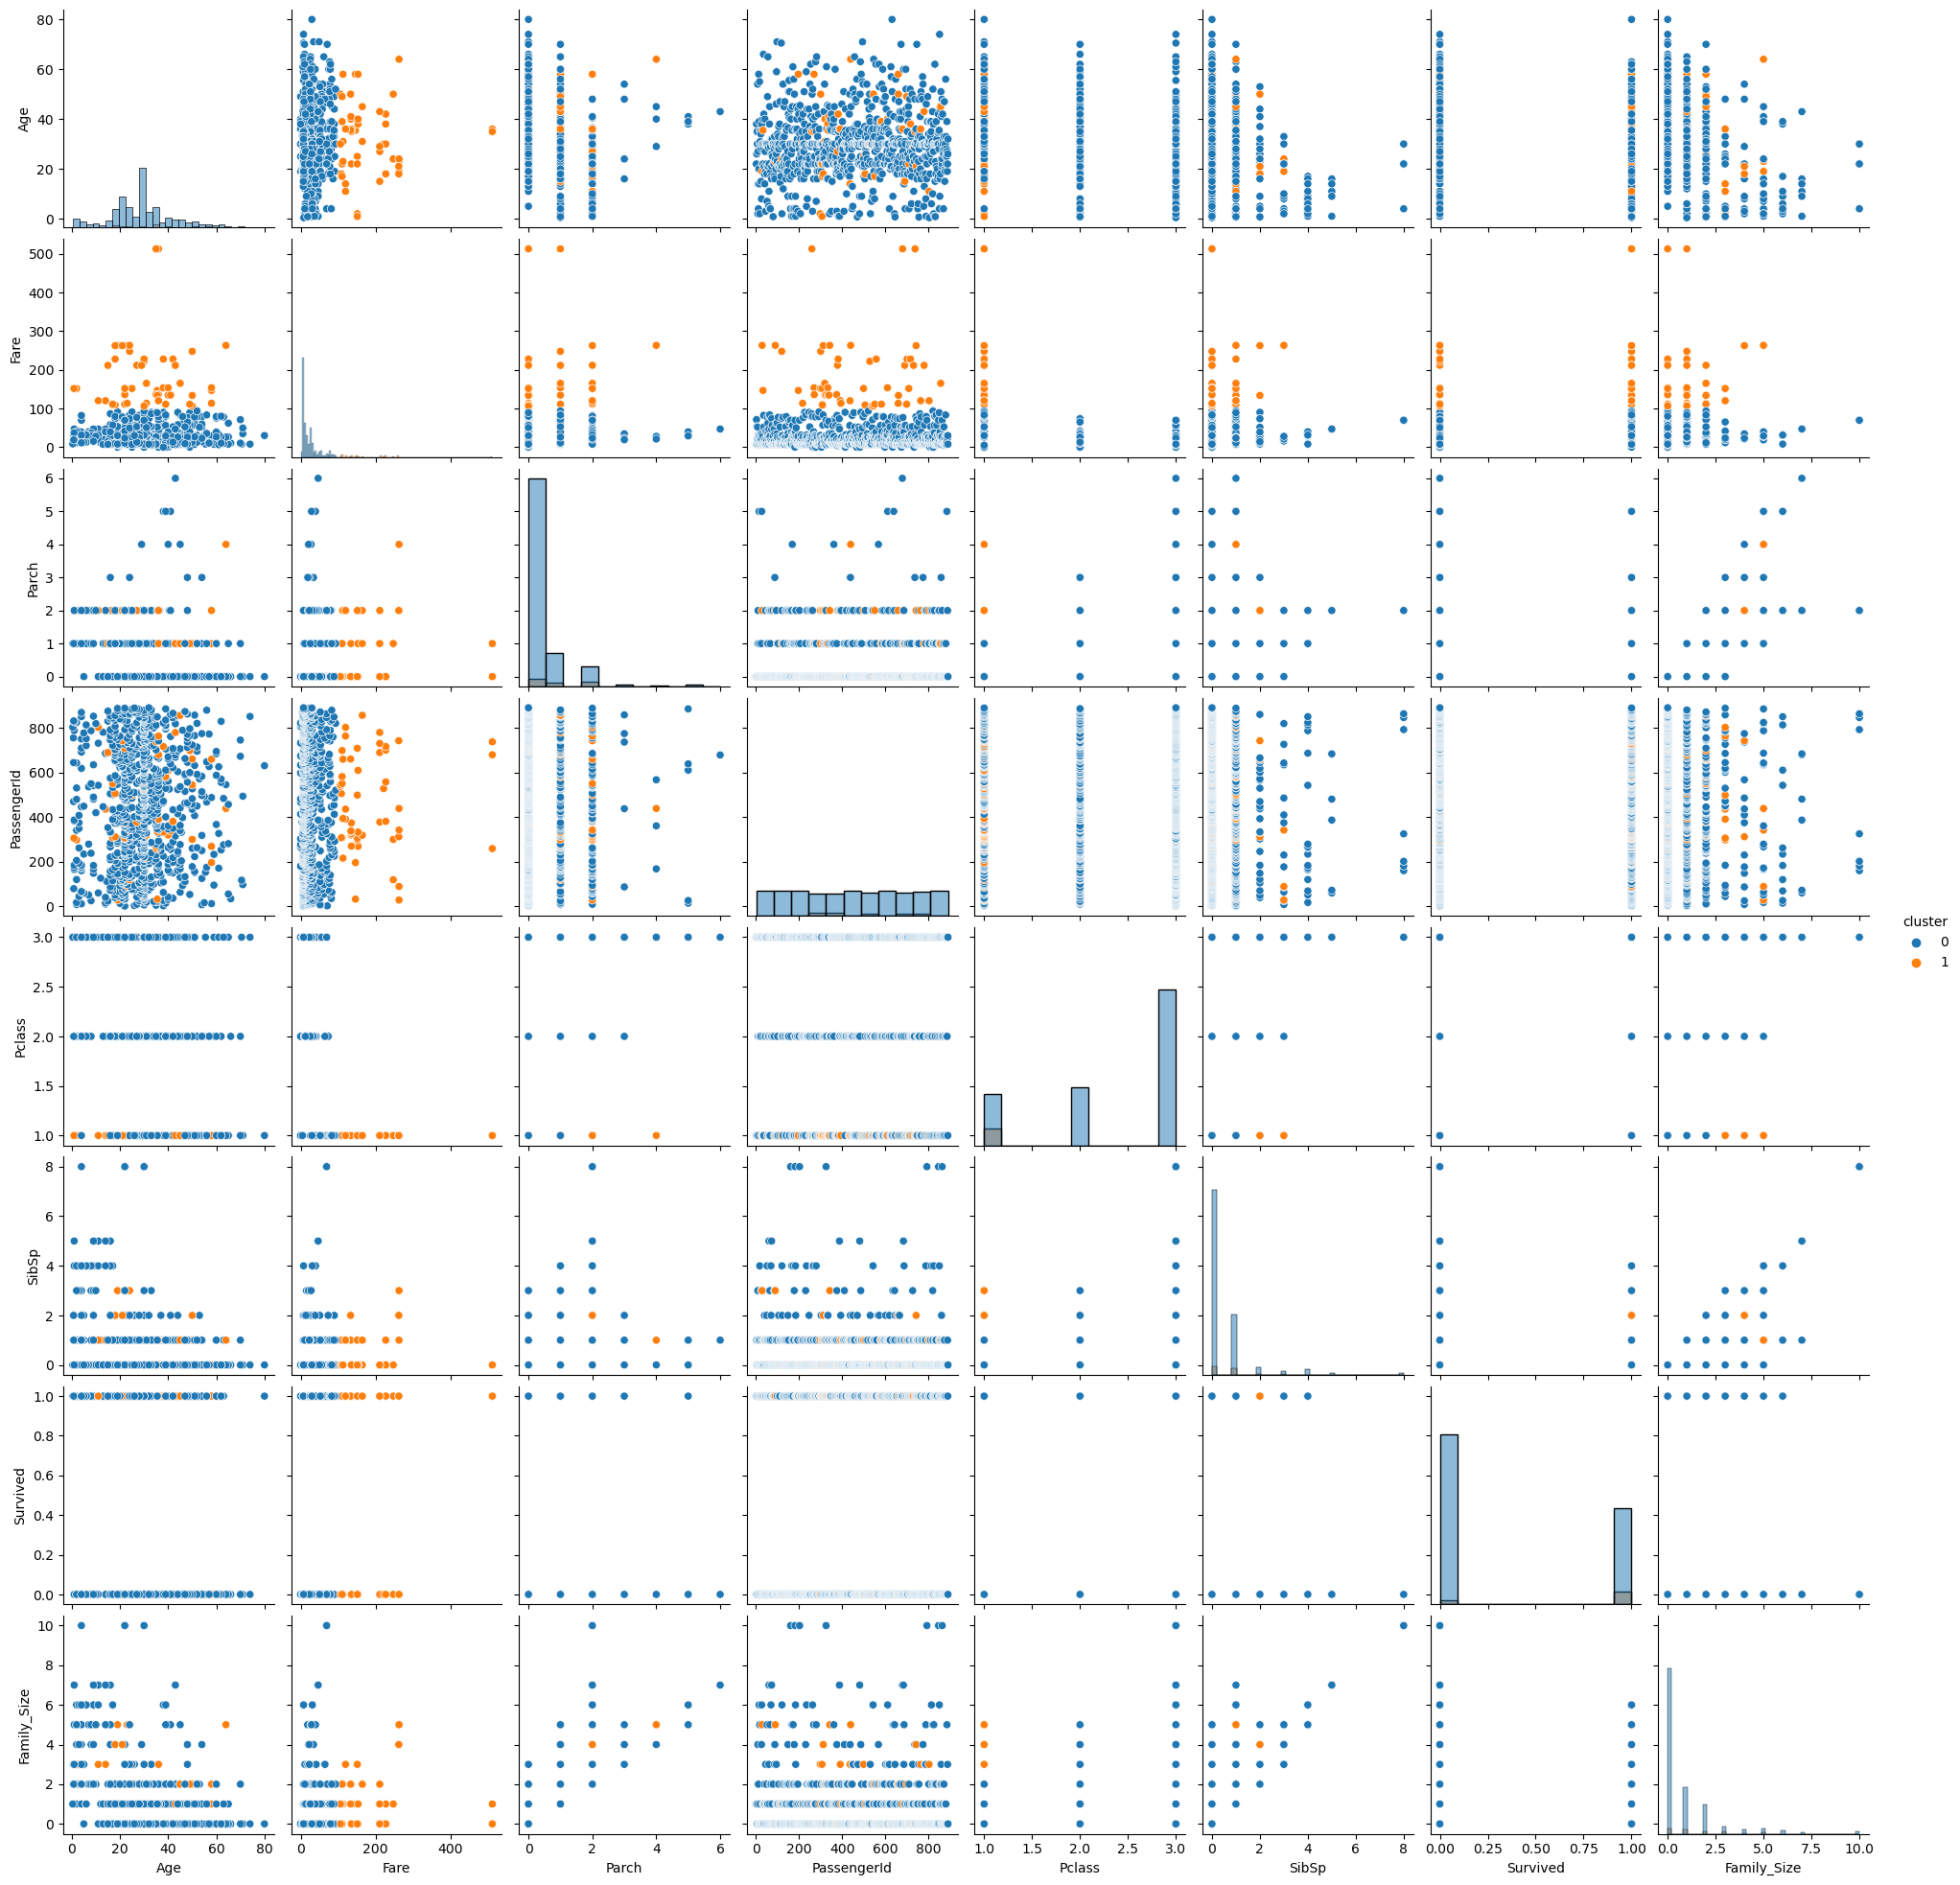

In [18]:
labels = kmeans.fit_predict(X)

# Create a scatter plot of the first two features (alcohol and malic acid), colored by cluster label
titanic['cluster'] = labels
sns.pairplot(titanic, hue='cluster', diag_kind='hist')
# plt.scatter(X[:, 0], X[:, 1], c=labels)
# plt.xlabel('Alcohol')
# plt.ylabel('Malic Acid')
# plt.title('K-Means Clustering on Wine Dataset')
plt.show()

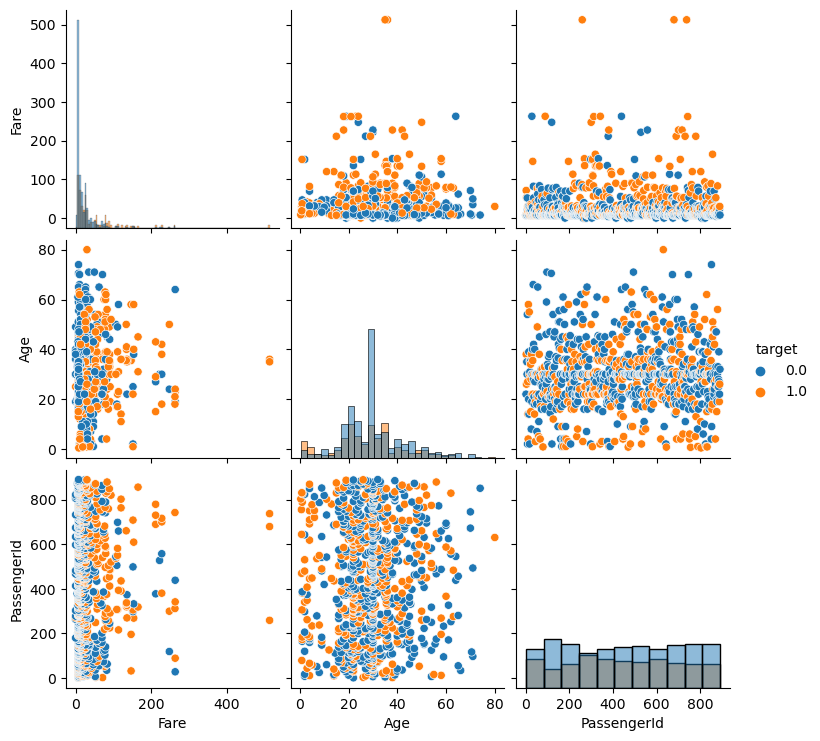

In [46]:
df = pd.DataFrame(X, columns=['Fare','Age','PassengerId'])
df['target'] = y
sns.pairplot(df, hue= 'target', diag_kind='hist')

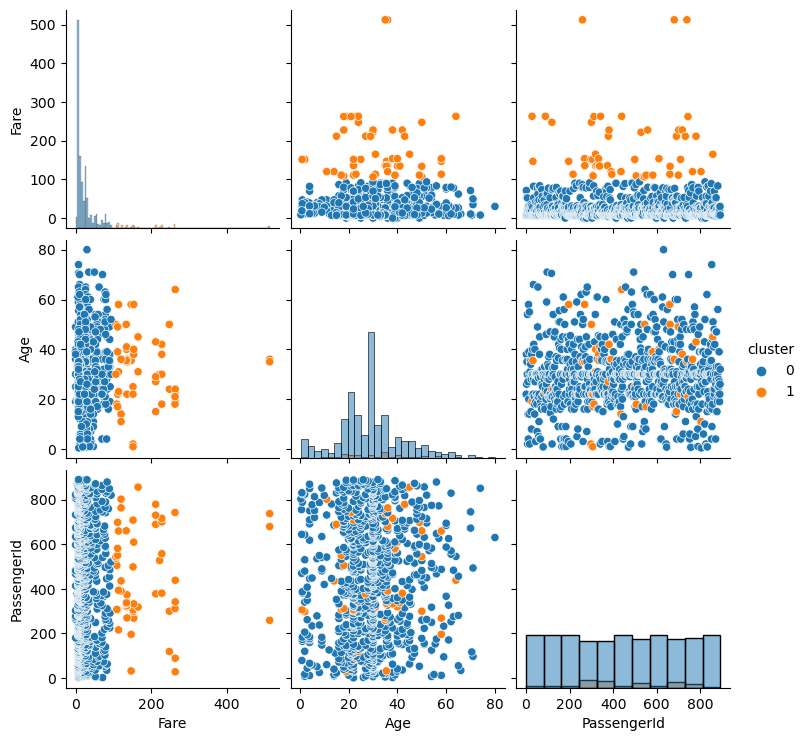

In [45]:
df = pd.DataFrame(X, columns=['Fare','Age','PassengerId'])
df['cluster'] = labels
sns.pairplot(df, hue='cluster', diag_kind='hist')

In [81]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X, labels)
print("Silhouette score:",s_score)
# Calculate the V-score
v_score = v_measure_score(y, labels)

# Print the V-score
print("V-score:", v_score)


Silhouette score: 0.5950428588633403
V-score: 0.00022733507063650262


Cluster 1 : [2.27640449e+00 3.04447640e+01 4.58426966e-01 3.68539326e-01
 3.19209546e+01 6.69000000e+02 3.21348315e-01 6.78651685e-01
 1.97752809e-01 7.64044944e-02 7.25842697e-01]
Cluster 2 : [2.34080717e+00 2.84478700e+01 5.87443946e-01 3.94618834e-01
 3.24868262e+01 2.23500000e+02 3.83408072e-01 6.16591928e-01
 1.81614350e-01 9.64125561e-02 7.21973094e-01]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


<AxesSubplot:xlabel='row_0'>

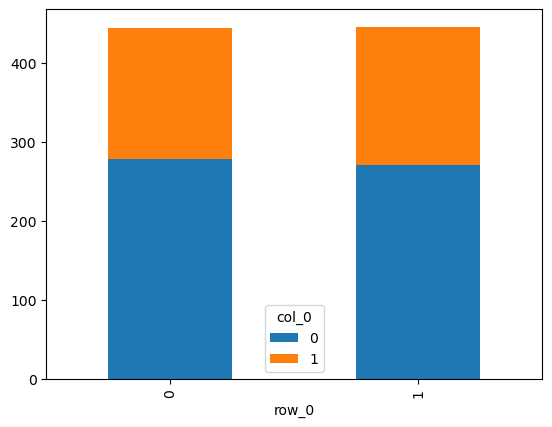

In [91]:
kmeans = KMeans(n_clusters=2, random_state=1714)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Print the mean values for each cluster
for i, center in enumerate(cluster_centers):
    print("Cluster", i+1, ":", center)
print(X.columns)
true_labels = y.values
predicted_labels = kmeans.fit_predict(X)
cluster_labels = pd.Series(predicted_labels)
cluster_labels.index = y
counts = pd.crosstab(index=cluster_labels, columns=true_labels)

# Visualize the distribution of wine types within each cluster
counts.plot(kind='bar', stacked=True)


In [92]:

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
predicted_labels = kmeans.fit_predict(X.values)

# Compute the mean values of each feature for each cluster
cluster_means = pd.DataFrame(X.values).groupby(predicted_labels).mean()

# Print the feature importance scores
feature_importance = cluster_means.diff().abs().sum(axis=0)
print(feature_importance.sort_values(ascending=False))

5     891.000000
4      10.917215
1       2.392862
2       0.279461
0       0.235690
6       0.084175
7       0.084175
8       0.033670
9       0.033670
10      0.033670
3       0.016835
dtype: float64


Expectation Maximization

In [106]:
# Load the titanic dataset
from sklearn.mixture import GaussianMixture
os.chdir(r"D:\\gatech\\cs7641\\supervised_learning")
titanic = pd.read_csv("titanic.csv", header = None)
#Adding the column names
titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']
titanic.columns = titanic_col_names

X = titanic.drop(['Survived'], axis=1)
# X2.dropna()

y = titanic['Survived']

X = pd.get_dummies(X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']]) 
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

clusters = gmm.predict(X)

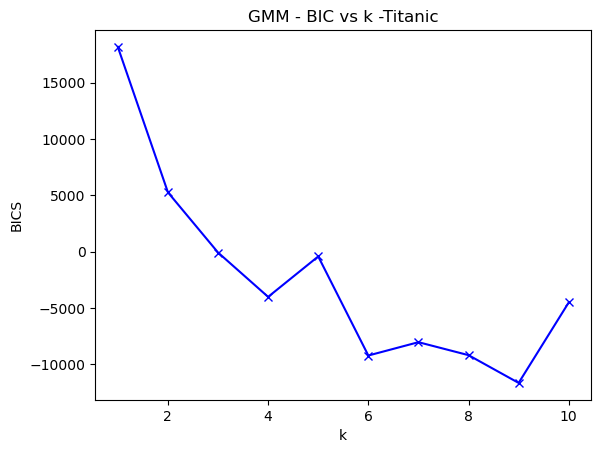

Best n_components: 9


In [107]:
# Range of n_components to try
os.chdir(r"D:\\gatech\\cs7641\\supervised_learning")
titanic = pd.read_csv("titanic.csv", header = None)
#Adding the column names
titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']
titanic.columns = titanic_col_names

X = titanic.drop(['Survived'], axis=1)
# X2.dropna()

y = titanic['Survived']

X = pd.get_dummies(X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']]) 
n_components_range = range(1, 11)

# Fit GMM for each value of n_components and compute BIC
bics = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))



# Plot the elbow curve
plt.plot(n_components_range, bics, 'bx-')
plt.xlabel('k')
plt.ylabel('BICS')
plt.title('GMM - BIC vs k -Titanic')
plt.show()

# Find the best value of n_components
best_n_components = n_components_range[np.argmin(bics)]
print(f"Best n_components: {best_n_components}")

In [110]:
#Best n_components is 2

gmm = GaussianMixture(n_components=2, random_state=7142)
gmm.fit(X)

clusters = gmm.predict(X)

silhouette_avg = silhouette_score(X, clusters)

print(f"Silhouette score: {silhouette_avg}")

Silhouette score: 0.005951473866220603


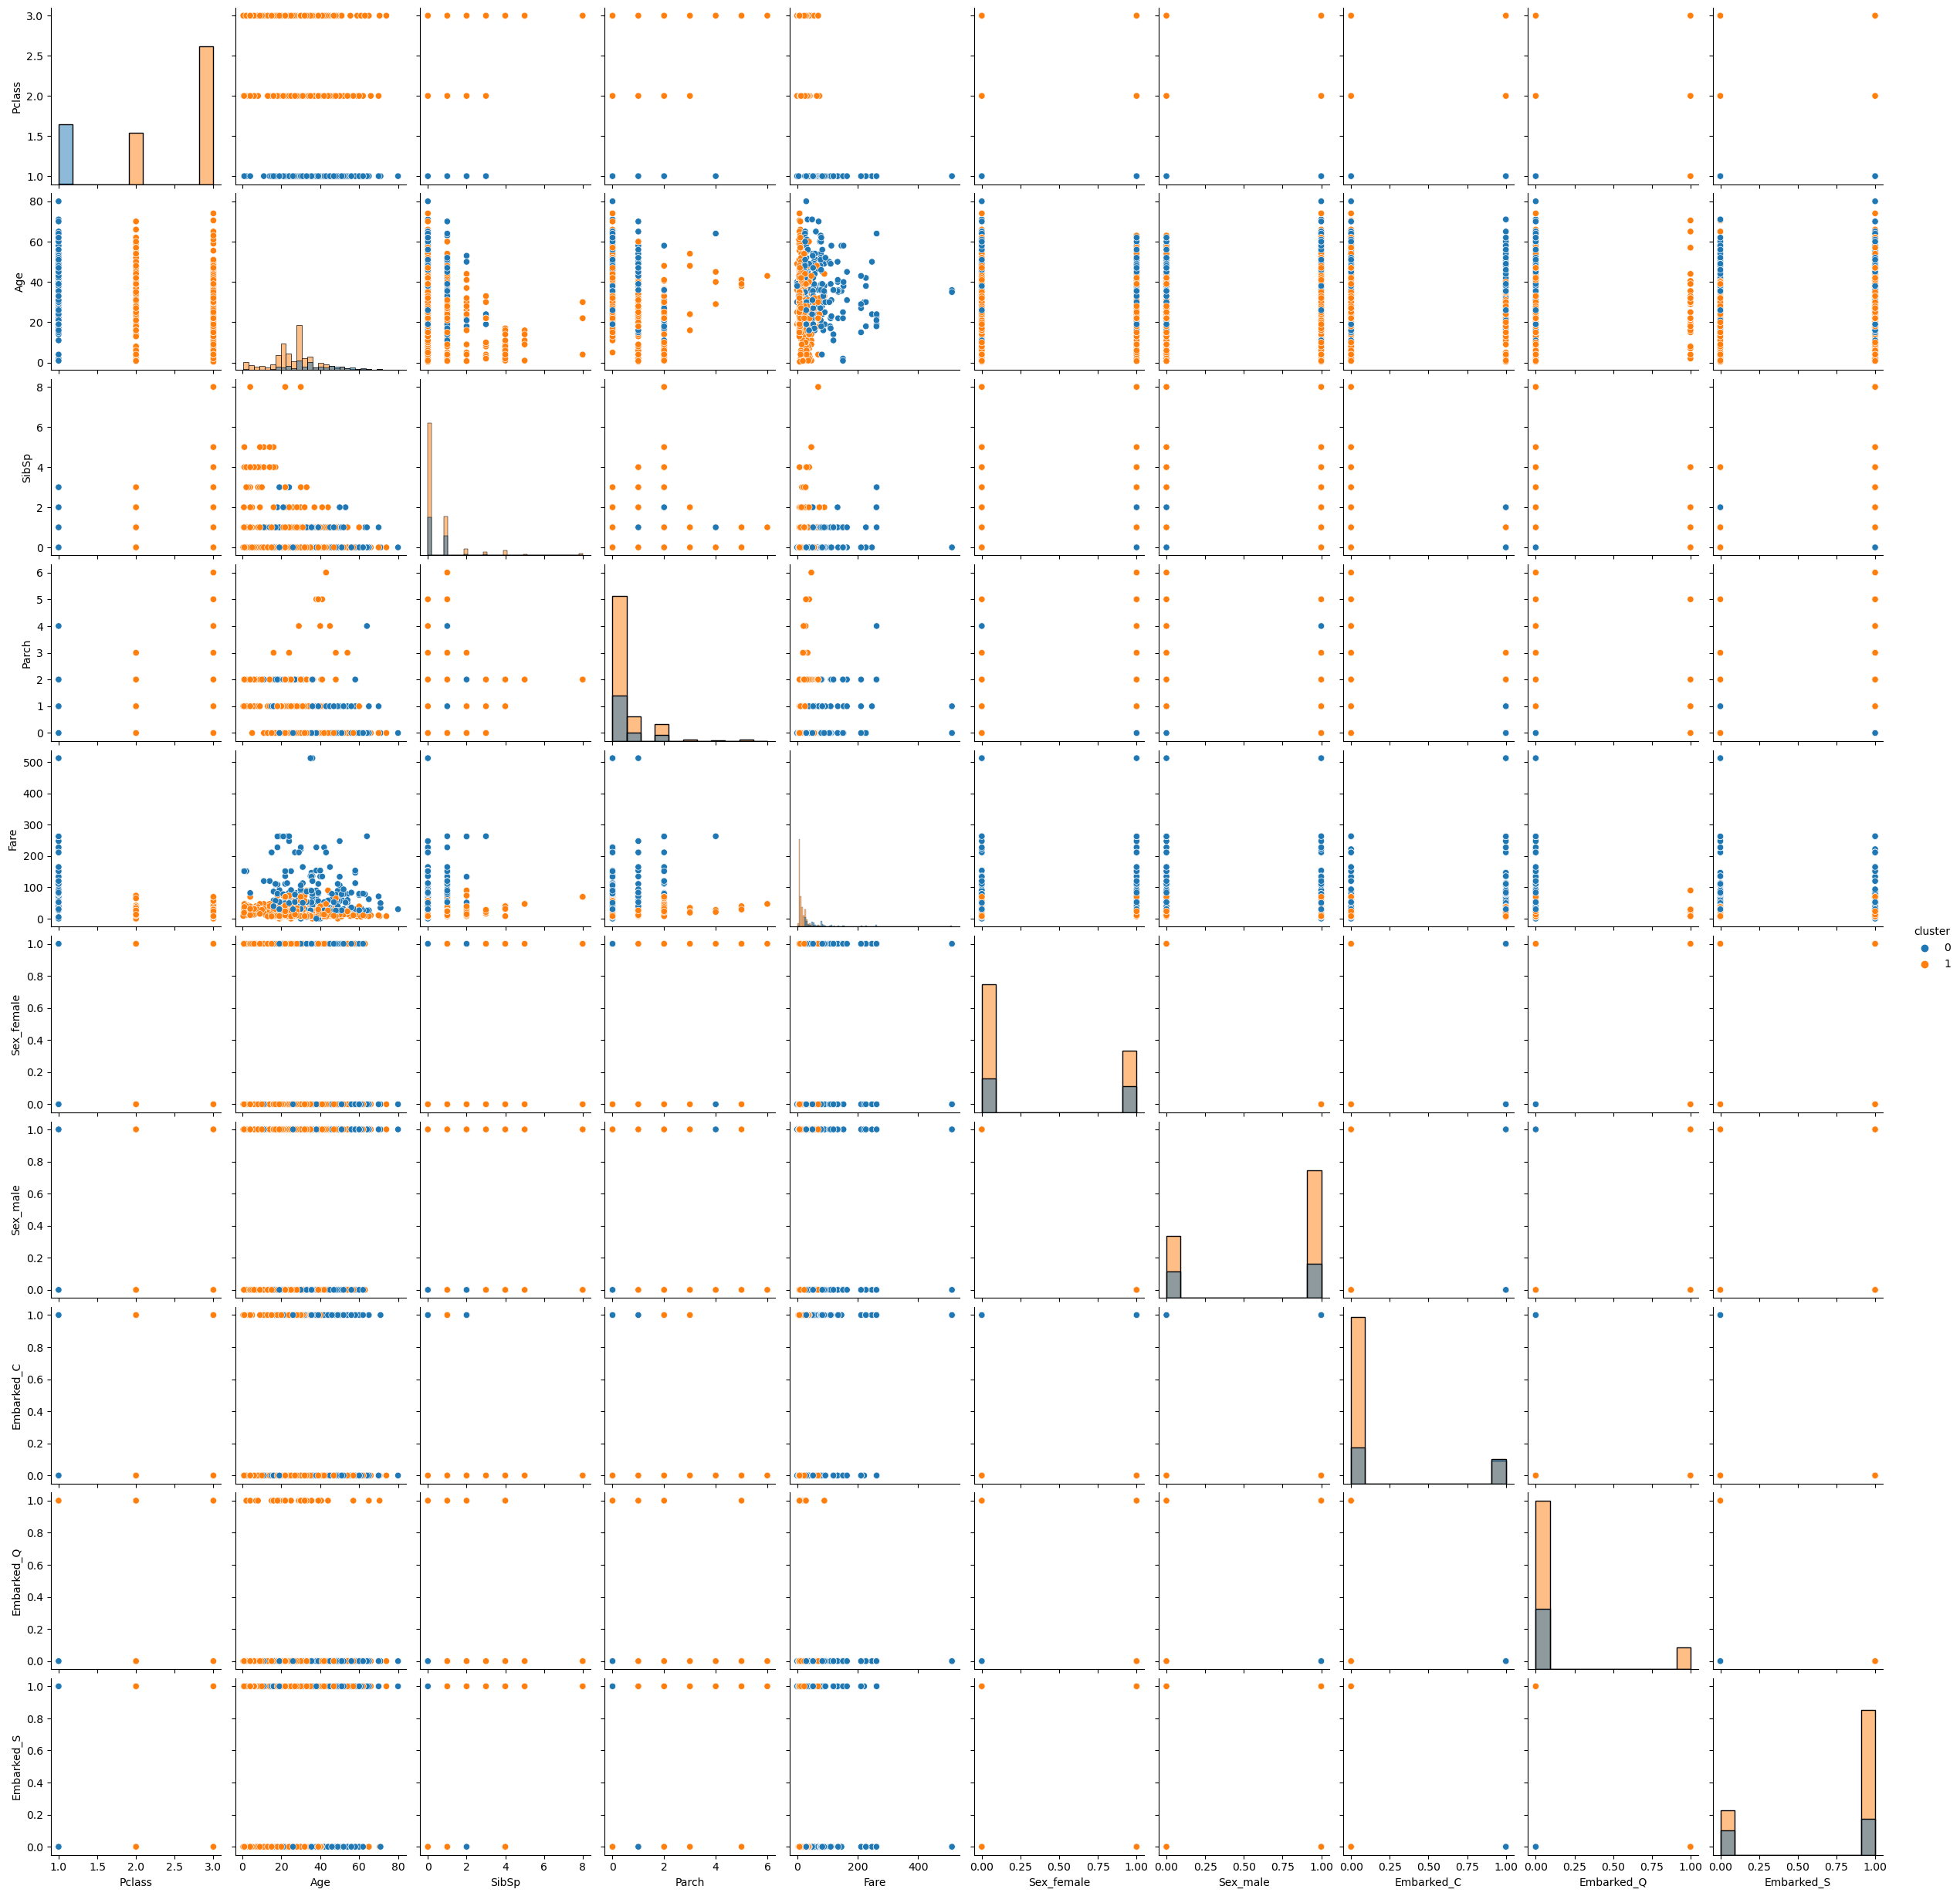

In [38]:
X['cluster'] = clusters
# sns.pairplot(X, hue='cluster')
sns.pairplot(X, hue='cluster', diag_kind='hist')


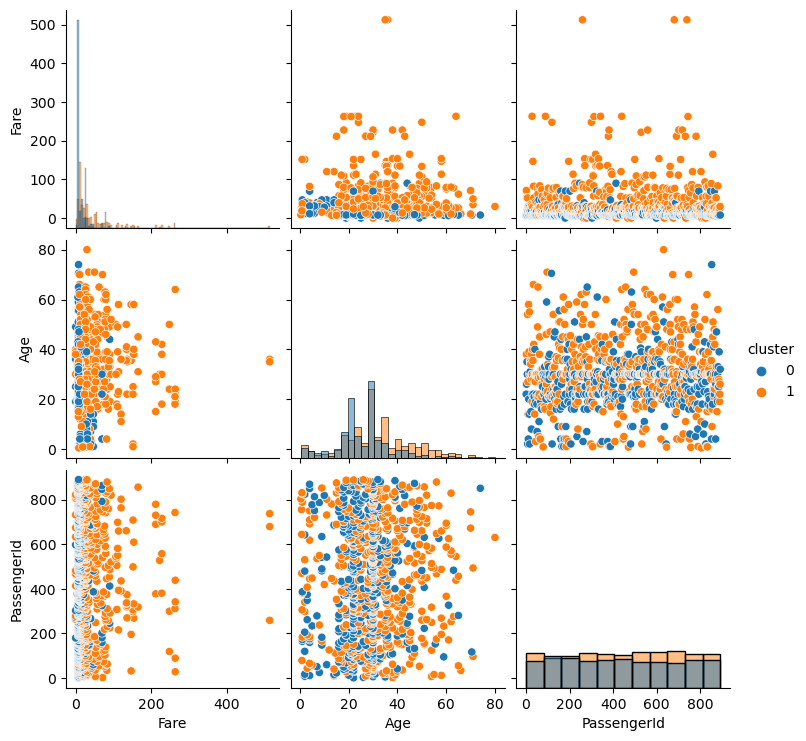

In [111]:
df = pd.DataFrame(X, columns=['Fare','Age','PassengerId'])
df['cluster'] = clusters
sns.pairplot(df, hue='cluster', diag_kind='hist')